### 농어 길이에 따른 무게값 예측

In [1]:
import pandas as pd
import numpy as np

### 1. 데이터 수집

In [2]:
# 회귀(regression)에서 사용
# 농어 데이터
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
len(perch_length)

56

### 2. 시각화

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

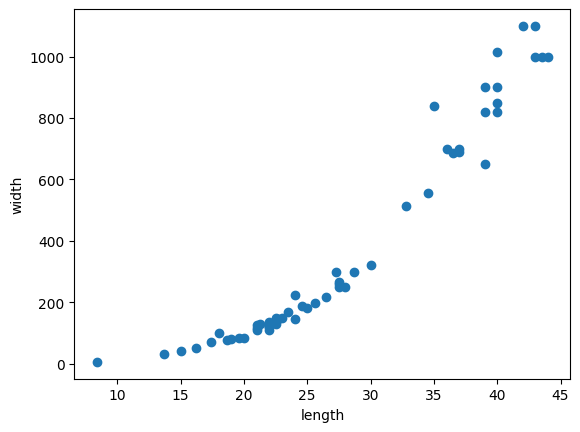

In [5]:
plt.scatter(perch_length,perch_weight)

plt.xlabel('length')
plt.ylabel('width')
plt.show()#일부러 곡선 형태로 데이터 준비함

### 3. 데이터 분리

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(perch_length, perch_weight, test_size=0.2, random_state=1)

In [8]:
#총 56개중에 44개가 훈련 데이터
X_train.shape,  y_train.shape

((44,), (44,))

In [9]:
#총 56개중에 12개가 테스트 데이터
X_test.shape,  y_test.shape

((12,), (12,))

### 입력 데이터의 차원 변경
*훈련 및 테스트 데이터 (입력데이터)는 반드시 2차원이여야 한다.

In [10]:
X_train=X_train[...,np.newaxis]
X_train.shape

(44, 1)

In [11]:
X_test=X_test[...,np.newaxis]
X_test.shape

(12, 1)

### 농어 길이 값 하나이기 때문에 표준화는 불필요하다.

### 4. 모델 생성

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knr=KNeighborsRegressor()
knr.fit(X_train,y_train) # [2차원 입력 데이터, 1차원 레이블]

KNeighborsRegressor()

### 5. 예측

In [14]:
pred = knr.predict(X_test)
pred

array([739. ,  66.3, 739. , 133. , 265.6, 265.6, 324.8, 629. , 884. ,
       656.2, 884. , 133. ])

### 6. 평가

* 분류에서는 종류를 예측하는 것이기 때문에 score 값이 정확도 (accurancy) 값이다. (맞힌 개수 / 전체 개수)
* 회귀에서는 score 값이 정확도 값이 아니고 결정계수 (Coefficeint of Determination, R^2)

In [15]:
'''

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

결정계수 = 1 - u/v
         = 1 - ((y_true - y_pred)** 2).sum()/ ((y_true - y_true.mean()) ** 2).sum()
         = 1 - 예측값 분산 / 실제값 분산
         
         
   ==> 만약에 y_pred (예측값)이 y_true(실제값)에 가까워진다면 R2는 1에 가까워진다.
   따라서 만약에 R2가 1이면 예측값이 정확하게 실제 값과 일치한다는 의미이다.
   결국 결정 계수의 용도는 우리가 만든 모델 (모델에 의해서 예측값이 산출됨)이 
   사용중인 실제 Data에 잘 맞는지를 알려주는 척도이다. 
   
단점: 정확도처럼 직관적이지 않기 때문에 추가적인 평가 지표가 필요하다. 
-MSE, MAE, RMSE 등

residual(잔차) sum of squares (RSS)

분산(variance) => 편차(잔차) 제곱 평균 = RSS/n
         
'''

'\n\nThe coefficient of determination :math:`R^2` is defined as\n:math:`(1 - \x0crac{u}{v})`, where :math:`u` is the residual\nsum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`\nis the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.\nThe best possible score is 1.0 and it can be negative (because the\nmodel can be arbitrarily worse). A constant model that always predicts\nthe expected value of `y`, disregarding the input features, would get\na :math:`R^2` score of 0.0.\n\n결정계수 = 1 - u/v\n         = 1 - ((y_true - y_pred)** 2).sum()/ ((y_true - y_true.mean()) ** 2).sum()\n         = 1 - 예측값 분산 / 실제값 분산\n         \n         \n   ==> 만약에 y_pred (예측값)이 y_true(실제값)에 가까워진다면 R2는 1에 가까워진다.\n   따라서 만약에 R2가 1이면 예측값이 정확하게 실제 값과 일치한다는 의미이다.\n   결국 결정 계수의 용도는 우리가 만든 모델 (모델에 의해서 예측값이 산출됨)이 \n   사용중인 실제 Data에 잘 맞는지를 알려주는 척도이다. \n   \n단점: 정확도처럼 직관적이지 않기 때문에 추가적인 평가 지표가 필요하다. \n-MSE, MAE, RMSE 등\n\nresidual(잔차) sum of squares (RSS)\n\n분산(variance) => 편차(잔차) 제곱 평균 = RSS/n\n  

In [16]:
knr.score(X_train,y_train)

0.9892846026958277

In [17]:
knr.score(X_test,y_test)

0.9332110898044563

### X_test에 대한 결정계수를 직접 구하기

* 1 - ((y_true - y_pred)** 2).sum()/ ((y_true - y_true.mean()) ** 2).sum()

In [18]:
y_pred=knr.predict(X_test)
mean=np.mean(y_test)

pred_var = ((y_test-y_pred)**2).sum()
real_var = ((y_test-mean)**2).sum()
R2= 1- pred_var/real_var
R2

0.9332110898044563

### 7. R2를 대신할 회귀 평가지표 사용 , MAE

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
y_pred=knr.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mae

58.84166666666667

In [21]:
### 결과적으로 예측한 농어의 무게가 58g 정도 실제값과 차이가 난다고 볼 수 있다.

### 8. 새로운 데이터 이용한 농어무게 예측

In [23]:
knr.predict([[50.0]])

array([1040.])

In [25]:
knr.predict([[100.0]])

array([1040.])

In [26]:
knr.predict([[1000.0]])

array([1040.])

### 시각화

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

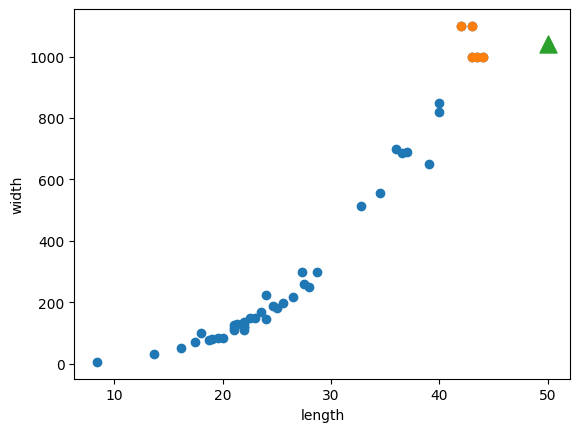

In [30]:
distances , indexes = knr.kneighbors([[50.0]])

plt.scatter(X_train , y_train)
plt.scatter(X_train[indexes], y_train[indexes])
plt.scatter(50, 1040, marker="^", s=150)# s 는 크기
plt.xlabel("length")
plt.ylabel("width")
plt.show()

### knr.predict는 새로운 값의 가장 가까운 5개의 이웃들의 평균값을 반환한다.

In [32]:
distances,indexes = knr.kneighbors([[50.0]])
y_train[indexes]

array([[1000., 1000., 1100., 1000., 1100.]])

In [33]:
np.mean(y_train[indexes])

1040.0